<a href="https://colab.research.google.com/github/Aman7Rathore/Rossmann-Sales-Prediction-/blob/main/Copy_of_Rossmann_Sales_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/Capstone_Project2/Rossmann Stores Data.csv')
store = pd.read_csv('/content/drive/MyDrive/Capstone_Project2/store.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df1.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN







**Merge The Dataset to gather more insights**

In [ ]:
df = pd.merge(df1,store,on='Store',how='left')

In [ ]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [ ]:

df.drop(['CompetitionOpenSinceMonth','CompetitionOpenSinceYear','CompetitionDistance'],axis=1,inplace=True)

In [ ]:
df.isnull().sum()

Store                   0
DayOfWeek               0
Date                    0
Sales                   0
Customers               0
Open                    0
Promo                   0
StateHoliday            0
SchoolHoliday           0
StoreType               0
Assortment              0
Promo2                  0
Promo2SinceWeek    508031
Promo2SinceYear    508031
PromoInterval      508031
dtype: int64

##**Remove NUll VALUES **

In [ ]:
for sxt in['Promo2SinceWeek','Promo2SinceYear','PromoInterval']:
  df[sxt].fillna(0,inplace = True)

In [ ]:
df['year'] = pd.DatetimeIndex(df['Date']).year
df['month'] = pd.DatetimeIndex(df['Date']).month

In [ ]:
df.drop('Date',axis=1,inplace=True)

In [ ]:
df['StateHoliday'].loc[df['StateHoliday'] == 0] = '0'


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
df['PromoInterval'].loc[df['PromoInterval'] == 0] = '0'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


##Convert the object datatype of various features to Numeric

In [ ]:
from sklearn.preprocessing import LabelEncoder
le_st = LabelEncoder()
le_at = LabelEncoder()
df['StoreType1'] = le_st.fit_transform(df['StoreType'])
df['Assortment1'] = le_at.fit_transform(df['Assortment'])
df['StateHoliday1'] = le_st.fit_transform(df['StateHoliday'])
df['PromoInterval1'] = le_st.fit_transform(df['PromoInterval'])
df['Promo2SinceWeek1'] = le_st.fit_transform(df['Promo2SinceWeek'])
df['Promo2SinceYear1'] = le_st.fit_transform(df['Promo2SinceYear'])



In [ ]:
df.drop(['StoreType','Assortment','StateHoliday','PromoInterval','Promo2SinceWeek','Promo2SinceYear'],axis=1,inplace=True)

##**NOW we will find OUTLIERS in our dataset**

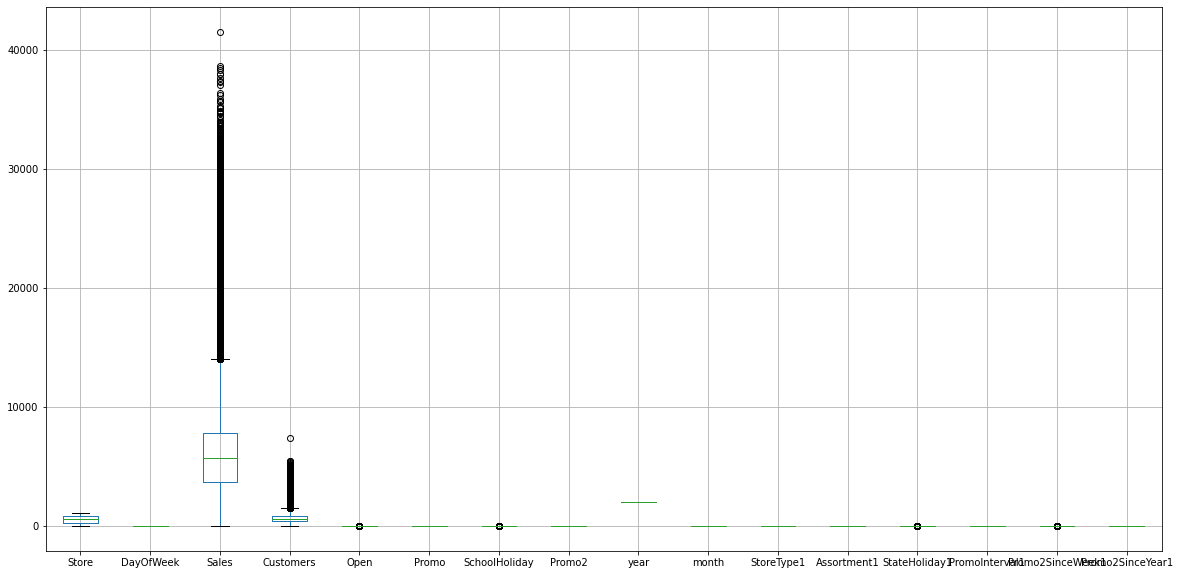

In [ ]:
df.boxplot(figsize=(20,10))

In [ ]:
mean = df.Customers.mean()
std = df.Customers.std()

threshold = 3

outliers = []
for i in df.Customers:
  z_score = i-mean/std
  if z_score>threshold:
    outliers.append(i)
print(len(outliers))


844339


In [ ]:
mean = df.Sales.mean()
std = df.Sales.std()

threshold = 3

outlier = []
for i in df.Sales:
  z_score = i-mean/std
  if z_score>threshold:
    outlier.append(i)
print(len(outlier))



844338


##**{*Since there are more than 50% of outliers in both our Customers column and Sales  column we will not remove any of the outliers*}**

##**Now performing DataVisualization**

[Text(0.5, 1.0, 'Sales per year')]

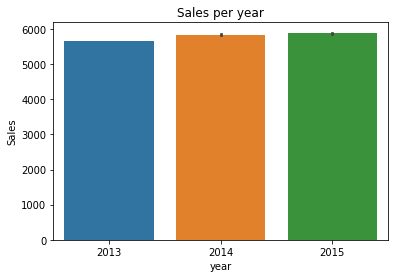

In [ ]:
sns.barplot(x='year',y='Sales',data=df).set(title='Sales per year')

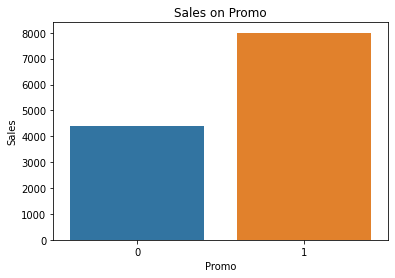

In [ ]:
sns.barplot(x='Promo',y='Sales',data=df).set(title='Sales on Promo')
plt.show()

#observation : Sales is more for shops which do Promo

[Text(0.5, 1.0, 'Sales per month')]

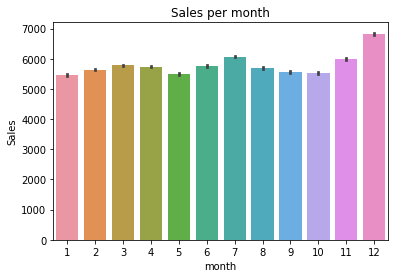

In [ ]:
sns.barplot(x='month',y='Sales',data=df).set(title='Sales per month')

#**Holiday season is preferred for expenditure**

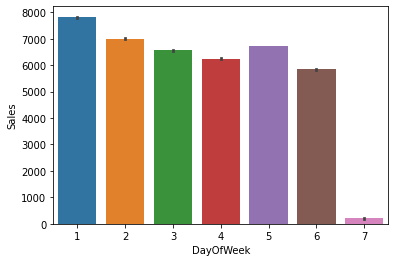

In [ ]:
sns.barplot(x='DayOfWeek',y='Sales',data=df)

#Observation : Highest sales are done on Monday and lowest is on sunday

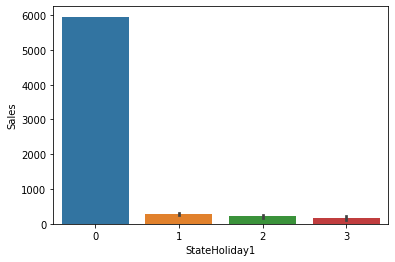

In [ ]:
sns.barplot(x='StateHoliday1',y='Sales',data=df)
plt.show()

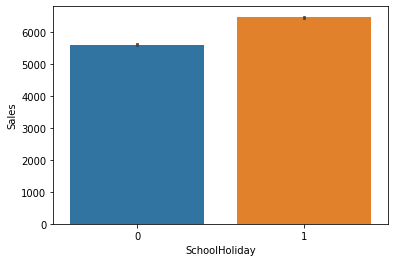

In [ ]:
sns.barplot(x='SchoolHoliday',y='Sales',data=df)

#Observation : Sales is slightly more on days when school is open.

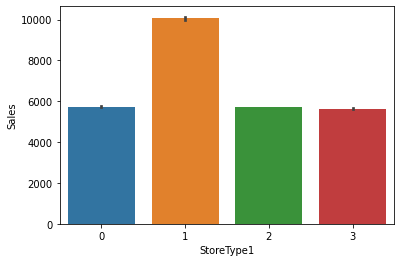

In [ ]:
sns.barplot(x='StoreType1',y='Sales',data=df)

#Observation : SALES for Shop 'b' has been the highest compare to other shops.

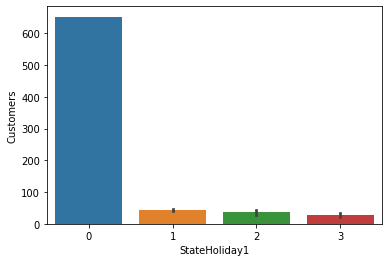

In [ ]:
sns.barplot(x='StateHoliday1',y='Customers',data=df)

In [ ]:
x = df.groupby('StoreType1')['Promo'].agg(np.mean)

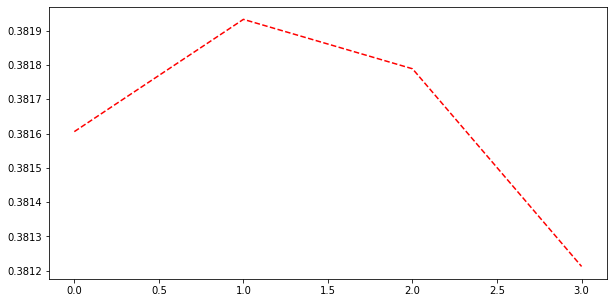

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(x,'r--')

#**INFERENCE : Even with the least no. of promotion by the shop 'b' the sales has been the highest**

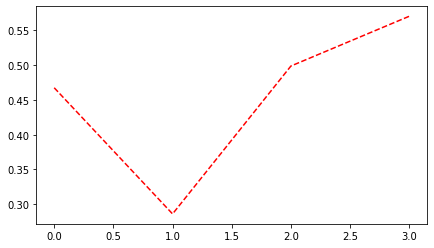

In [ ]:
x = df.groupby('StoreType1')['Promo2'].agg(np.mean)
plt.figure(figsize=(7,4))
plt.plot(x,'r--')
plt.show()

#**INFERENCE : Shop 'd' has been actively participating in the promo2**

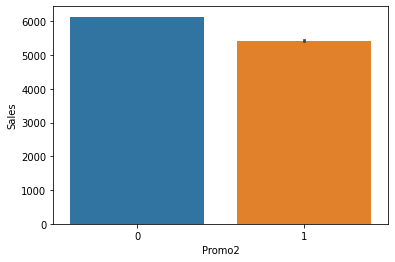

In [ ]:
sns.barplot(x='Promo2',y='Sales',data=df)

#**Inference : Sales for stores which have participated in the promo2 has not been increased so overall promo2 for these stores have been quite ineffective**

# ** NOW we will perform Feature Engineering**

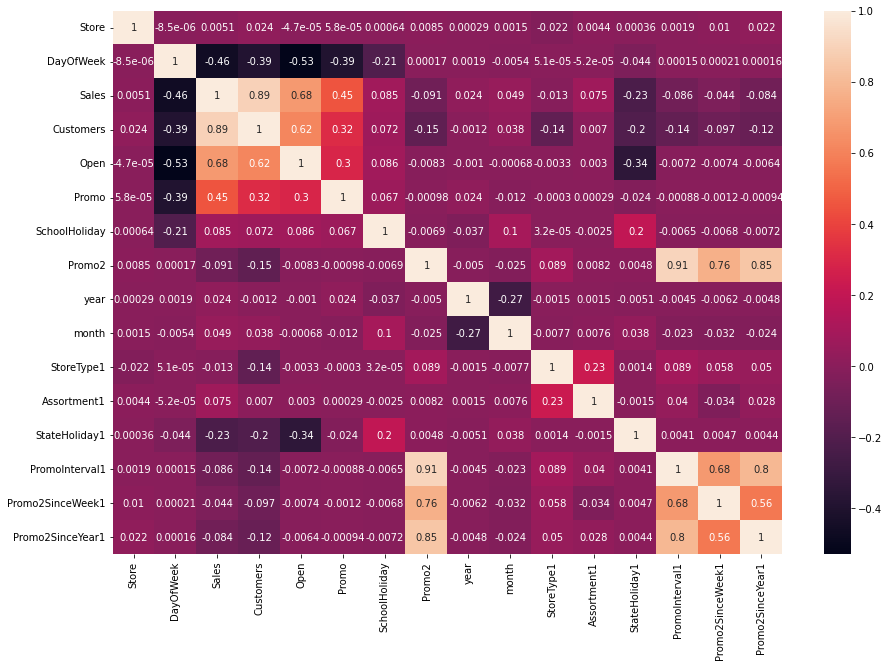

In [ ]:
corrmat = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corrmat,annot=True)


In [ ]:
#To find features that are highly correlated with each other


corr_matrix = df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]


In [ ]:
print(to_drop)

['PromoInterval1']


In [ ]:
df.drop(['PromoInterval1'],axis=1,inplace=True)

Highly correlated independent feature has been removed

#**Building a regression model**

In [54]:
x = df.drop('Sales',axis=1)
y = df['Sales']

In [55]:
from sklearn.model_selection import train_test_split

X_train,Y_train,X_test,Y_test = train_test_split(x,y.values.reshape(-1,1),test_size=0.33,shuffle=False,random_state=60)

In [56]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
Y_train = scaler.fit_transform(Y_train)
x_test = scaler.fit_transform(X_test)


In [57]:
regressor = LinearRegression()

In [58]:
regressor.fit(x,y)

LinearRegression()

In [59]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(x,y)

LinearRegression()

In [60]:
regression.score(x,y)

0.8662671929531843

In [61]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge = Ridge()
Parameters = {'alpha':[1e-15,1e-14,1e-2,10,20,30,40,50,60,70,80,90,100]}
ridge_regressor = GridSearchCV(ridge,Parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(x,y)


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-14, 0.01, 10, 20, 30, 40, 50, 60,
                                   70, 80, 90, 100]},
             scoring='neg_mean_squared_error')

In [62]:
print(ridge_regressor.best_params_)


{'alpha': 100}


In [63]:
print(ridge_regressor.best_score_)

-1999818.03152251


In [64]:
ridge = Ridge()
Parameters = {'alpha':[100]}
ridge_regressor = GridSearchCV(ridge,Parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(x,y)

GridSearchCV(cv=5, estimator=Ridge(), param_grid={'alpha': [100]},
             scoring='neg_mean_squared_error')

In [68]:
Y_pred = ridge_regressor.predict(x)


In [69]:
from sklearn.metrics import r2_score

In [70]:
r2_score(y,Y_pred)*100

86.62671687690822

In [71]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(max_depth=20,n_jobs=-1,random_state=21)
model.fit(x,y)

RandomForestRegressor(max_depth=20, n_jobs=-1, random_state=21)

In [72]:
y_predict = model.predict(x)

In [74]:
r2_score(y_predict,y)*100

98.80145461529247